# Visualize Fourier Features

In [30]:
%reload_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
import numpy as np

from GraphModel import FourierFeatures

In [39]:
def fourier_vis(K,limit):
    ff = FourierFeatures(K=K, precompute_limit=limit - 1)

    # Indices 0..limit-1
    idx = torch.arange(limit, dtype=torch.float32)

    # Get features (limit, 2K)
    if hasattr(ff, 'precomputed_features') and ff.precomputed_features is not None:
        feats = ff.precomputed_features[:limit]
    else:
        feats = ff(idx)

    feats_np = feats.detach().cpu().numpy()  # (limit, 2K)
    feats_plot = feats_np.T  # (2K, limit) => y=features, x=indices

    plt.figure(figsize=(10, 5))
    # extent ensures x-axis shows 0..limit-1 and y-axis 0..(2K-1)
    plt.imshow(
        feats_plot,
        aspect='auto',
        origin='upper',
        cmap='coolwarm',
        extent=[0, limit - 1, 0, 2 * K - 1]
    )
    plt.colorbar(label='Feature value')
    plt.xlabel(f'Index (0-{limit - 1})')
    plt.ylabel('Feature channel'.format(2 * K - 1))
    plt.title(f'Fourier Features Heatmap (indices 0...{limit-1}, K={K})')
    plt.tight_layout()
    plt.show()


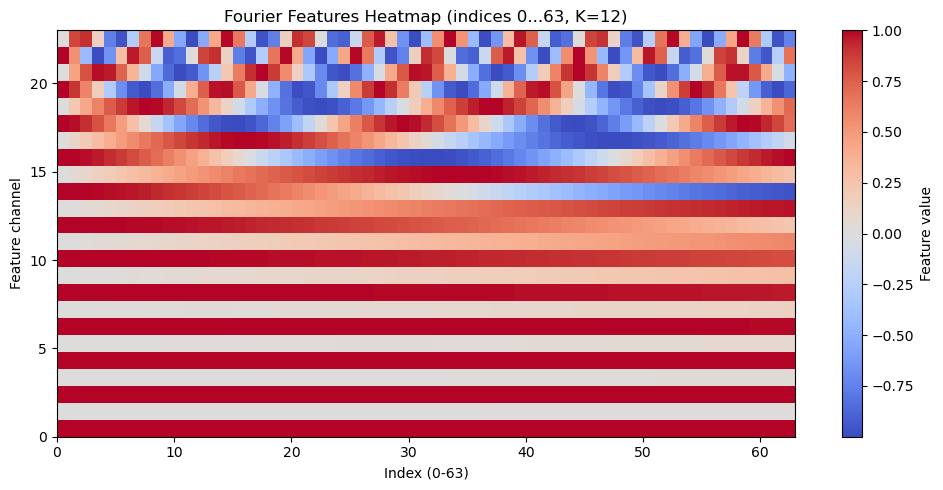

In [44]:
fourier_vis(12, 64)